The molecule inserted looks like this:


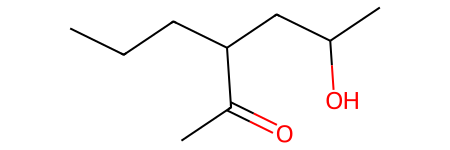

--------------------------------------
--------------------------------------
Grignard disconnection available
--------------------------------------
Option 1
Reactant 1


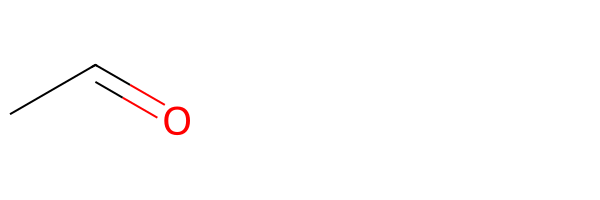

Reactant 2


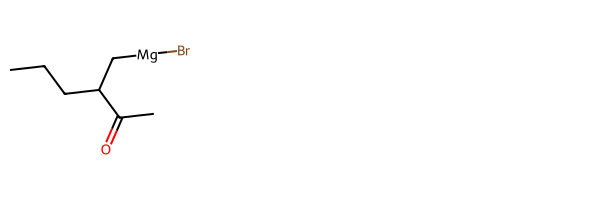

Solvent


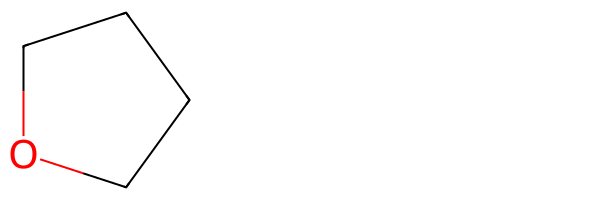

--------------------------------------
Option 2
Reactant 1


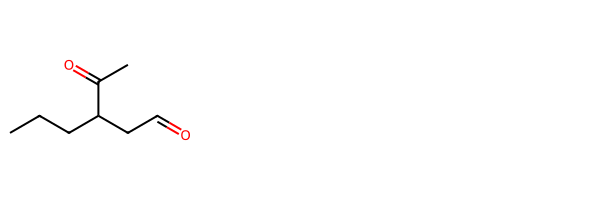

Reactant 2


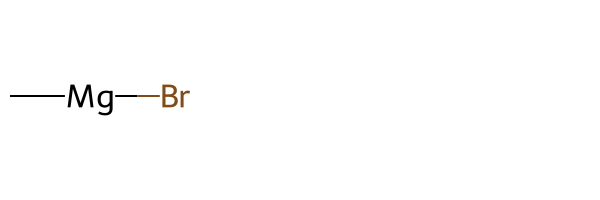

Solvent


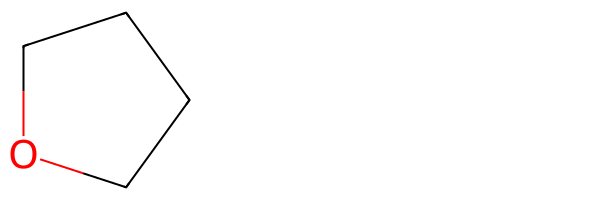

--------------------------------------
--------------------------------------
C(sp3)-C(sp3) bond dissociation available in alpha position of carbonyl compound (mono/disubstituted)
--------------------------------------
Option 1
Reactant 1


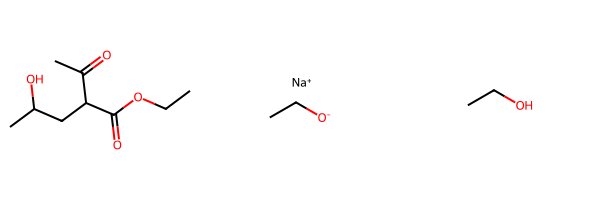

Reactant 2


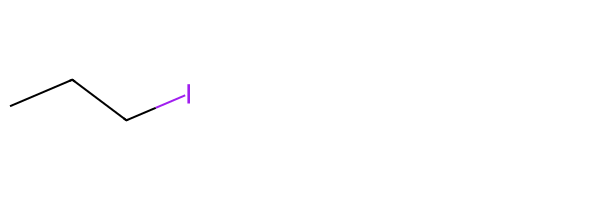

Once the two reactants are combined, the following product is obtained


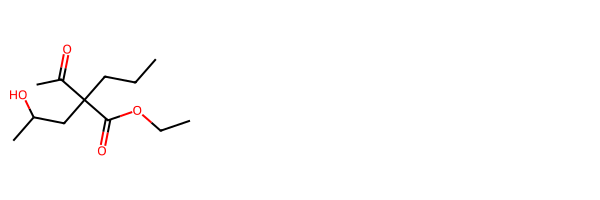

This product needs to be hydrolyzed using NaOH, then quenched using an acid, and finally heated in order to obtain the target molecule
--------------------------------------
Option 2
Reactant 1


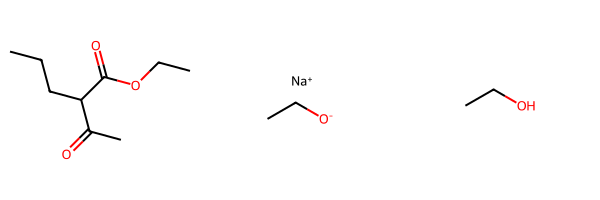

Reactant 2


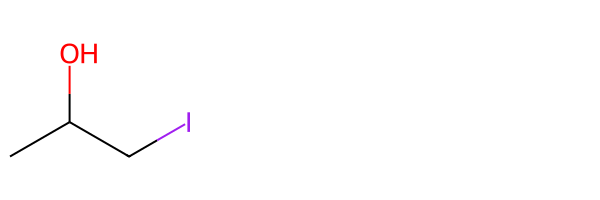

Once the two reactants are combined, the following product is obtained


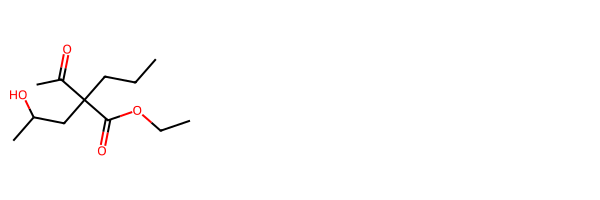

This product needs to be hydrolyzed using NaOH, then quenched using an acid, and finally heated in order to obtain the target molecule
--------------------------------------
--------------------------------------
[<rdkit.Chem.rdchem.Mol object at 0x0000021D9755F3E0>, <rdkit.Chem.rdchem.Mol object at 0x0000021D9755FED0>, <rdkit.Chem.rdchem.Mol object at 0x0000021DB7A36DC0>, <rdkit.Chem.rdchem.Mol object at 0x0000021DB7329A10>, <rdkit.Chem.rdchem.Mol object at 0x0000021DB7329930>, <rdkit.Chem.rdchem.Mol object at 0x0000021DB7A36DC0>, <rdkit.Chem.rdchem.Mol object at 0x0000021DB877A8F0>, <rdkit.Chem.rdchem.Mol object at 0x0000021DB7A367A0>, <rdkit.Chem.rdchem.Mol object at 0x0000021DB7A36570>, <rdkit.Chem.rdchem.Mol object at 0x0000021DB877A880>, <rdkit.Chem.rdchem.Mol object at 0x0000021DB7A1F220>, <rdkit.Chem.rdchem.Mol object at 0x0000021DB877A810>, <rdkit.Chem.rdchem.Mol object at 0x0000021DB7A367A0>, <rdkit.Chem.rdchem.Mol object at 0x0000021DB7A36570>, <rdkit.Chem.rdchem.Mol object 

In [27]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import display
IPythonConsole.ipython_useSVG=True

def unique_list_reactants (reactants_tuple: tuple) -> float:
    '''
    A tuple of tuples, containing the reactants (as Mol objects) needed to form the target molecule is received.
    This function returns a list of unique lists of the reactants (as Mol objects),
    accounting for the symmetry of the molecule.
    '''
    if not isinstance(reactants_tuple, tuple) or not all(isinstance(t, tuple) for t in reactants_tuple):
        raise TypeError(
            f"Invalid type {type(reactants_tuple)}: 'reactants_tuple' should be a tuple of tuples."
        )
    for inner_tuple in reactants_tuple:
        if not all(isinstance(mol, Chem.Mol) for mol in inner_tuple):
            raise TypeError(
                "Invalid type in reactants_tuple: all elements should be Mol objects."
            )
    reactants_list = []
    for r in reactants_tuple:   #The tuple of tuples is transformed into a list of lists
        rxn_site = []           #of reactants (as String objects, using SMILES)
        for molecule in r:
            rxn_site.append(Chem.MolToSmiles(molecule))
        reactants_list.append(rxn_site)
    reactants_set = {tuple(r) for r in reactants_list} #The list is transformed in a set of tuples, to have unique elements
    reactants_list_unique = [list(r) for r in reactants_set] #The set of tuples is trnasformed into a list of unique lists
    reactants_unique_mol = []
    for r in reactants_list_unique: #Here, the list of unique list of reactants (as Mol objects) is created
        mols = []
        for smiles in r:
            mols.append(Chem.MolFromSmiles(smiles))
        reactants_unique_mol.append(mols)
    return reactants_unique_mol

def flatten_list(nested_list) ->list:
    """
    Flatten a nested list containing rdchem.Mol elements or other lists.
    
    Parameters:
    nested_list (list): The nested list to be flattened.
        
    Returns:
    list: A flattened list containing rdchem.Mol elements.

    Raises:
    TypeError: If nested_list is not a list.
    """
    if not isinstance (nested_list, list):
        raise TypeError(
            f" Invalid type {type(nested_list)}: 'nested_list'"
            f" Should be passed as a list object."
        )
    #List to store the rdchem.Mol elements of a nested list.
    flattened_list = []
    
    for item in nested_list:
        if isinstance(item, Chem.rdchem.Mol): #Verrifies if the element is a Mol type element; if so it is added to the list
            flattened_list.append(item)
        elif isinstance(item, list): #Else, if this is another list, it flattens it
            flattened_list.extend(flatten_list(item))
    return flattened_list
    
def C_S_disconnection (mol: Chem.rdchem.Mol) ->int:
    '''
    The function receives a mol object and verrifes if a C(sp3 hybridized)-S bond is present
    If yes, the reactants from which the bond could be formed: 
    an alkyl iodide and a thiol in the presence of potassium carbonate are displayed and 1 is returned
    If the sulfur atom is bonded to two C(sp3 hybridized) atoms, 
    there are two possible disconnections for each S atom.
    If the molecule has a certain symmetry, the number of disconnections is reduced.
    If the bond is not present, the function returns 0.
    '''
    if not isinstance (mol, Chem.rdchem.Mol):
        raise TypeError(
            f" Invalid type {type(mol)}: 'mol'"
            f" Should be passed as a mol object."
        )
    if mol.HasSubstructMatch(Chem.MolFromSmarts('[C^3][S]')): #Verifies if the C(sp3 hybridized)-S is present
        print (f"C(sp3)-S disconection available")
        print (f"--------------------------------------")
        iodine_smiles = 'I'
        potassium_carbonate_smiles ='C(=O)([O-])[O-].[K+].[K+]'
        iodine = Chem.MolFromSmiles(iodine_smiles)
        potassium_carbonate = Chem.MolFromSmiles(potassium_carbonate_smiles)
        rxn = AllChem.ReactionFromSmarts('[C^3:1][S:2].[I:3]>>[C:1][I:3].[S:2]') #Searches for the bond pattern and returns reactants
        reactants = unique_list_reactants(rxn.RunReactants((mol,iodine )))       #to make the bond in a list of lists; each list = reactive site
        opt = 1 #Parameter to count the number of possible reactants that form C(sp3 hybridized)-S bonds
        reactants_returned = [] #List of reactants that are going to be returned
        for r in reactants: #Reactants are displayed
            print(f"Option {opt}")
            reactant_1 = [r[0]]
            reactant_2 = [r[1], potassium_carbonate]
            #The reactants corresponding to each C(sp3)-S are added in the list that is returned
            reactants_returned.append(r[0])
            reactants_returned.append(r[1])
            reactants_returned.append(potassium_carbonate)
            print(f"Reactant 1")
            display(Draw.MolsToGridImage(reactant_1))
            print(f"Reactant 2")
            display(Draw.MolsToGridImage(reactant_2))
            opt += 1
            print (f"--------------------------------------")
        print(f"--------------------------------------")
        return [1, reactants_returned]
    return [0]

def C_O_disconnection(mol: Chem.rdchem.Mol) ->list:
    """
    Verifies if a C(sp3 hybridized)-O bond is present in the given molecule.

    If a C(sp3)-O bond is present:
    The function identifies reactants that could form this bond, specifically an alkyl iodide and an alcohol
    in the presence of sodium hydroxide.
    Displays the possible disconnections and returns 1 along with the list of reactants.

    If the oxygen atom is bonded to two C(sp3 hybridized) atoms, two possible disconnections for each O atom are considered.
    Symmetry in the molecule reduces the number of unique disconnections.

    Parameters:
    mol (Chem.rdchem.Mol): The molecule to be analyzed.

    Returns:
    list: [1, reactants_returned] if a C(sp3)-O bond is found, where reactants_returned is a list of reactants.
    [0] if the bond is not found.

    Raises:
    TypeError: If the input is not a Chem.rdchem.Mol object.
    """
    
    # Validate input type
    if not isinstance (mol, Chem.rdchem.Mol):
        raise TypeError(
            f" Invalid type {type(mol)}: 'mol'"
            f" Should be passed as a mol object."
        )
    if mol.HasSubstructMatch(Chem.MolFromSmarts('[C^3][O][C]')): #Verifies if an ether is present
        iodine = Chem.MolFromSmiles('I')
        sodium_hydroxide = Chem.MolFromSmiles('[Na+].[OH-]')
        rxn = AllChem.ReactionFromSmarts('[C^3:1][O:2][C:4].[I:3]>>[C^3:1][I:3].[O:2][C:4]') #Searches for the ether and returns the reactants to make it in 
        reactants = unique_list_reactants(rxn.RunReactants((mol, iodine))) # a list of lists; each list = reactive site 
        reactants_returned = [] #List of reactants that are going to be returned
        opt = 1 #Parameter to count the number of possible reactants that form ethers
        for r in reactants: #Reactants are displayed
            print(f"Option {opt}")
            reactant_1 = [r[0]]
            reactant_2 = [r[1], sodium_hydroxide]
            #The reactants corresponding to each C(sp3)-O are added in the list that is returned
            reactants_returned.append(r[0])
            reactants_returned.append(r[1])
            reactants_returned.append(sodium_hydroxide)
            print(f"Reactant 1")
            display(Draw.MolsToGridImage(reactant_1))
            print(f"Reactant 2")
            display(Draw.MolsToGridImage(reactant_2))
            opt += 1
            print (f"--------------------------------------")
        print(f"--------------------------------------")
        return [1, reactants_returned]
    return [0] 
        
    
def ester_disconnection (mol: Chem.rdchem.Mol) ->int:
    '''
    The function receives a mol object and verrifes if an ester functional group is present
    If yes, the reactants from which the ester could be formed: 
    an alcohol and a carboxylic acid in the presence of strong acid as catalyst are displayed and 1 is returned
    If the molecule has a certain symmetry, the number of disconnections is reduced.
    If the ester is not present, the function returns 0.
    '''
    if not isinstance (mol, Chem.rdchem.Mol):
        raise TypeError(
            f" Invalid type {type(mol)}: 'mol'"
            f" Should be passed as a mol object."
        )
    if mol.HasSubstructMatch(Chem.MolFromSmarts('[C^2](=[O])[O][C]')): #Verifies if an ester is present 
        print (f"Ester disconnection available")
        print (f"--------------------------------------")
        proton_smiles = '[H+]'
        proton = Chem.MolFromSmiles(proton_smiles)
        hydroxyl_smile = 'O'
        hydroxyl = Chem.MolFromSmiles(hydroxyl_smile)
        rxn = AllChem.ReactionFromSmarts('[C^2:1](=[O:2])[O:3][C:4].[O:5]>>[C^2:1](=[O:2])[O:5].[O:3][C:4]') #Searches for the ester and returns
        reactants = unique_list_reactants(rxn.RunReactants((mol, hydroxyl))) #reactants to make the ester in a list of lists; each list = reactive site
        reactants_returned = [] #List of reactants that are going to be returned
        opt = 1 #Parameter to count the number of possible reactants that form esters
        for r in reactants: #The reactants and the catalyst are displayed
            print(f"Option {opt}")
            reactant_1 = [r[0]]
            reactant_2 = [r[1]]
            catalyst = [proton]
            #The reactants corresponding to each ester site are added in the list that is returned
            reactants_returned.append(r[0])
            reactants_returned.append(r[1])
            reactants_returned.append(proton)
            print(f"Reactant 1")
            display(Draw.MolsToGridImage(reactant_1))
            print(f"Reactant 2")
            display(Draw.MolsToGridImage(reactant_2))
            print(f"Catalyst")
            display(Draw.MolsToGridImage(catalyst))
            opt += 1
            print (f"--------------------------------------")
        print (f"--------------------------------------")
        return [1, reactants_returned]
    return [0]

def amide_disconnection (mol: Chem.rdchem.Mol) ->list :
    """
    Verifies if an amide functional group is present in the given molecule.

    If an amide is present:
    Identifies reactants that could form the amide, specifically an amine and an acyl chloride,
    in the presence of pyridine as a catalyst.
    Displays the possible disconnections and returns 1 along with the list of reactants.

    If the molecule has symmetry, the number of unique disconnections is reduced.

    Parameters:
    mol (Chem.rdchem.Mol): The molecule to be analyzed.

    Returns:
    list: [1, reactants_returned] if the ester group is found, where reactants_returned is a list of reactants.
    [0] if the ester group is not found.

    Raises:
    TypeError: If the input is not a Chem.rdchem.Mol object.
    """
    # Validate input type
    if not isinstance (mol, Chem.rdchem.Mol):
        raise TypeError(
            f" Invalid type {type(mol)}: 'mol'"
            f" Should be passed as a mol object."
        )
    if mol.HasSubstructMatch(Chem.MolFromSmarts('[C^2](=[O])[N][C]')): #Verifies if an amide is present
        print (f"Amide disconnection available")
        print (f"--------------------------------------")
        pyridine = Chem.MolFromSmiles('c1ccccn1')
        chlorine = Chem.MolFromSmiles('Cl')
        rxn = AllChem.ReactionFromSmarts('[C^2:1](=[O:2])[N:3].[Cl:4]>>[C^2:1](=[O:2])[Cl:4].[N:3]') #Searches for the amide and returns
        reactants = unique_list_reactants(rxn.RunReactants((mol, chlorine))) #reactants to make the amide in a list of lists; each list = reactive site
        reactants_returned = [] #List of reactants that are going to be returned
        opt = 1 #Parameter to count the number of possible reactants that form amides
        for r in reactants: #The reactants and the catalyst are displayed
            print(f"Option {opt}")
            reactant_1 = [r[0]]
            reactant_2 = [r[1]]
            catalyst = [pyridine]
            #The reactants corresponding to each amide site are added in the list that is returned
            reactants_returned.append(r[0])
            reactants_returned.append(r[1])
            reactants_returned.append(pyridine)
            print(f"Reactant 1")
            display(Draw.MolsToGridImage(reactant_1))
            print(f"Reactant 2")
            display(Draw.MolsToGridImage(reactant_2))
            print(f"Catalyst")
            display(Draw.MolsToGridImage(catalyst))
            opt += 1
            print (f"--------------------------------------")
        print (f"--------------------------------------")
        return [1, reactants_returned]
    return [0]

def acyl_chloride_disconnection (mol: Chem.rdchem.Mol) ->list:
    """
    Verifies if an acyl chloride functional group is present in the given molecule.

    If an acyl chloride is present:
    Identifies reactants that could form the acyl chloride, specifically a carboxylic acid 
    and thionyl chloride.
    Displays the possible disconnections and returns 1 along with the list of reactants.

    If the molecule has symmetry, the number of unique disconnections is reduced.

    Parameters:
    mol (Chem.rdchem.Mol): The molecule to be analyzed.

    Returns:
    list: [1, reactants_returned] if the ester group is found, where reactants_returned is a list of reactants.
    [0] if the ester group is not found.

    Raises:
    TypeError: If the input is not a Chem.rdchem.Mol object.
    """
    # Validate input type
    if not isinstance (mol, Chem.rdchem.Mol):
        raise TypeError(
            f" Invalid type {type(mol)}: 'mol'"
            f" Should be passed as a mol object."
        )
    if mol.HasSubstructMatch(Chem.MolFromSmarts('[C^2](=[O])[Cl]')): #Verifies if the acyl chloride is present
        print (f"Acyl chloride disconnection available")
        print (f"--------------------------------------")
        oxygen_smiles = 'O'
        chlorine_smiles = '[Cl]'
        SOCl2_smiles ='Cl[S](Cl)=O'
        oxygen = Chem.MolFromSmiles(oxygen_smiles)
        chlorine = Chem.MolFromSmiles(chlorine_smiles)
        SOCl2 = Chem.MolFromSmiles(SOCl2_smiles)
        rxn = AllChem.ReactionFromSmarts('[C^2:1](=[O:2])[Cl:3].[O:4]>>[C^2:1](=[O:2])[O:4].[Cl:3]') #Searches for the acyl chloride and returns reactants
        reactants = unique_list_reactants(rxn.RunReactants((mol, oxygen)))#to make the acyl chloride in a list of lists; each list = reactive site
        reactants_returned = [] #List of reactants that are going to be returned
        opt = 1 #Parameter to count the number of possible reactants that form acyl chlorides
        for r in reactants: #The reactants and the catalyst are displayed
            print(f"Option {opt}")
            reactant_1 = [r[0]]
            reactant_2 = [SOCl2]
            #The reactants corresponding to each amide site are added in the list that is returned
            reactants_returned.append(r[0])
            reactants_returned.append(SOCl2)
            print(f"Reactant 1")
            display(Draw.MolsToGridImage(reactant_1))
            print(f"Reactant 2")
            display(Draw.MolsToGridImage(reactant_2))
            opt += 1
            print (f"--------------------------------------")
        print (f"--------------------------------------")
        return [1, reactants_returned]
    return [0]

def amine_disconnection (mol: Chem.rdchem.Mol) ->list:
    """
    Checks for the presence of an alkyl amine, subtituted with at least one C(sp3).

    If such a pattern is found:
    Identifies and displays reactants from which the pattern could be formed: a silyl enol ether and a carbonyl compound,
    with pyridine, also displayed, as a catalyst.
    Displays the reaction intermediate.
    Displays the reduction conditions of the intermediate.
    Ensures that, if the molecule has certain symmetry, the number of disconnections is reduced.
    Returns a list containing 1 and a list of the reactants, catalyst, intermediates and hydrogenation conditions.

    If the pattern is not present:
    Returns a list containing 0.

    Parameters:
    mol (Chem.rdchem.Mol): The molecule to be analyzed.

    Returns:
    list: [1, reactants_returned] if the pattern is found, where reactants_returned is a list of reactants.
    [0] if the pattern is not found.

    Raises:
    TypeError: If the input is not a Chem.rdchem.Mol object.
    """
    # Validate input type
    if not isinstance(mol, Chem.rdchem.Mol):
        raise TypeError(
            f"Invalid type :{type(mol)}: 'mol'"
            f"Should be passed as a mol object."
        )

    if mol.HasSubstructMatch(Chem.MolFromSmarts('[C^3][N]')): #Verifies if the alkyl amine (containing at least one sp3 subtituent is present) 
        print (f"Amine disconnection available")
        print (f"--------------------------------------")
        oxygen_smiles = 'O'
        chlorine_smiles='Cl'
        LiAlH4_smiles ='[Li+].[AlH4-]'
        pyridine_smiles = 'c1ccccn1'
        oxygen = Chem.MolFromSmiles(oxygen_smiles)
        chlorine = Chem.MolFromSmiles(chlorine_smiles)
        LiAlH4 = Chem.MolFromSmiles(LiAlH4_smiles)
        pyridine = Chem.MolFromSmiles(pyridine_smiles)
        rxn = AllChem.ReactionFromSmarts('[N:1][C^3:2].[Cl:3].[O:4]>>[N:1].[C^2:2](=[O:4])[Cl:3]') #Searches for the bond pattern and returns reactants
        reactants = unique_list_reactants(rxn.RunReactants((mol,chlorine,oxygen)))#to make the bond in a list of lists; each list = reactive site
        reactants_returned = [] #List of reactants that are going to be returned 
        opt = 1 #Parameter to count the number of possible reactants that form C(sp3 hybridized)-N bonds
        for r in reactants: #Prints the reactants
            print(f"Option {opt}")
            reactant_1 = [r[0]]
            reactant_2 = [r[1]]
            print(f"Reactant 1")
            display(Draw.MolsToGridImage(reactant_1))
            print(f"Reactant 2")
            display(Draw.MolsToGridImage(reactant_2))
            print(f"Catalyst")
            display(Draw.MolsToGridImage([pyridine]))
            print (f"Once combined, the reactants give the following intermediate")
            #The reaction intermediate is formed and is displayed afterwards
            rxn_intermediate = AllChem.ReactionFromSmarts('[N^3:1].[Cl:2][C:3]=[O:4]>>[N^3:1][C:3]=[O:4].[Cl:2]')
            intermediate = unique_list_reactants(rxn_intermediate.RunReactants((r[0],r[1])))
            display(Draw.MolsToGridImage([intermediate[0][0]]))
            print (f"This intermediate needs to be reduced" #The reducing conditions of the intermediate are displayed
               f" in order to obtain the target molecule. The following reducing agent could be used:")
            display(Draw.MolsToGridImage([LiAlH4]))
            #The reactants corresponding to each reactive site are added in the list that is returned
            reactants_returned.append(r[0])
            reactants_returned.append(r[1])
            reactants_returned.append(pyridine)
            reactants_returned.append(intermediate[0][0])
            reactants_returned.append(LiAlH4)
            opt += 1
            print (f"--------------------------------------")
        print (f"--------------------------------------")
        return [1, reactants_returned]
    return [0]

def amino_alcohol_1_2 (mol: Chem.rdchem.Mol) ->list:
    """
    Verifies if a pattern of a 1,2 amino alcohol is present in the given molecule.

    If the pattern is present:
    Identifies reactants that could form the pattern, specifically an amine in the presence
    of a strong base such as sodium amide and an epoxide.
    Displays the reactants and returns 1 along with the list of reactants.

    If the molecule has symmetry, the number of unique disconnections is reduced.

    Parameters:
    mol (Chem.rdchem.Mol): The molecule to be analyzed.

    Returns:
    list: [1, reactants_returned] if the pattern is found, where reactants_returned is a list of reactants.
    [0] if the pattern is not found.

    Raises:
    TypeError: If the input is not a Chem.rdchem.Mol object.
    """
    # Validate input type
    if not isinstance (mol, Chem.rdchem.Mol):
        raise TypeError(
            f"Invalid type :{type(mol)}: 'mol'"
            f"Should be passed as a mol object."
        )
    if mol.HasSubstructMatch(Chem.MolFromSmarts('[C^3]([OH])[C^3][NH]')): #Searches for a 1,2 amino-alcohol 
        print (f"1,2 amino-alcohol disconnection")
        print (f"--------------------------------------")
        NaNH2_smiles='[NH2-].[Na+]'
        NaNH2 = Chem.MolFromSmiles(NaNH2_smiles)
        rxn = AllChem.ReactionFromSmarts('[C^3:1]([OH:2])[C^3:3][NH:4]>>[C^3:1]1[O:2][C^3:3]1.[N:4]') #The pattern is searched and reactants
        reactants = unique_list_reactants(rxn.RunReactants((mol,)))#that could make it are returned as a list of lists; each list = reactive site
        reactants_returned = [] #List of reactants that are going to be returned
        opt = 1 #Parameter to count the number of possible reactants that form the 1,2 amino-alcohol
        for r in reactants: #Reactants are displayed
            print(f"Option {opt}")
            reactant_1 = [r[0]]
            reactant_2 = [r[1], NaNH2]
            print(f"Reactant 1")
            display(Draw.MolsToGridImage(reactant_1))
            print(f"Reactant 2")
            display(Draw.MolsToGridImage(reactant_2))
            opt += 1
            #The reactants corresponding to each reactive site are added in the list that is returned
            reactants_returned.append(r[0])
            reactants_returned.append(r[1])
            reactants_returned.append(NaNH2)
            print (f"--------------------------------------")
        print (f"--------------------------------------")
        return [1, reactants_returned]
    return [0]

def grignard (mol: Chem.rdchem.Mol) ->list:
    """
    Verifies if an alcohol is present in the given molecule.

    If the alcohol is present:
    Identifies reactants that could form the alcohol, specifically a carbonyl compound
    and an organomagnesian compound, usign THF as solvent (Grignard reaction).
    Displays the reactants and solvent and returns 1 along with the list of reactants.

    If the molecule has symmetry, the number of unique disconnections is reduced.

    Parameters:
    mol (Chem.rdchem.Mol): The molecule to be analyzed.

    Returns:
    list: [1, reactants_returned] if the pattern is found, where reactants_returned is a list of reactants.
    [0] if the pattern is not found.

    Raises:
    TypeError: If the input is not a Chem.rdchem.Mol object.
    """
    # Validate input type
    if not isinstance (mol, Chem.rdchem.Mol):
        raise TypeError(
            f"Invalid type :{type(mol)}: 'mol'"
            f"Should be passed as a mol object."
        )
    if mol.HasSubstructMatch(Chem.MolFromSmarts('[C][C^3][OH]')): #Verifies if an alcohol is present
        print (f"Grignard disconnection available")
        print (f"--------------------------------------")
        # Define SMILES for necessary compounds
        Mg_smiles='[Mg]'
        Br_smiles='Br'
        O_smiles='O'
        THF_smiles='C1CCOC1'
        Mg = Chem.MolFromSmiles(Mg_smiles)
        Br = Chem.MolFromSmiles(Br_smiles)
        O = Chem.MolFromSmiles(O_smiles)
        THF = Chem.MolFromSmiles(THF_smiles)
        rxn = AllChem.ReactionFromSmarts('[C:1][C^3:2][O:3].[Mg:4].[Br:5]>>[C^2:2](=[O:3]).[C:1][Mg:4][Br:5]') #Searches for the alcohol and returns
        reactants = unique_list_reactants(rxn.RunReactants((mol,Mg,Br))) #the reactants to make it in a list of lists; each list = reactive site
        reactants_returned = [] #List of reactants that are going to be returned
        opt = 1 #Parameter to count the number of possible reactants that form C(sp3 hybridized)-O bonds
        for r in reactants: #Reactants and solvent are displayed
            print(f"Option {opt}")
            reactant_1 = [r[0]]
            reactant_2 = [r[1]]
            solvent = [THF]
            print(f"Reactant 1")
            display(Draw.MolsToGridImage(reactant_1))
            print(f"Reactant 2")
            display(Draw.MolsToGridImage(reactant_2))
            print(f"Solvent")
            display(Draw.MolsToGridImage(solvent))
            opt += 1
            #The reactants corresponding to each reactive site are added in the list that is returned
            reactants_returned.append(r[0])
            reactants_returned.append(r[1])
            reactants_returned.append(THF)
            print (f"--------------------------------------")
        print(f"--------------------------------------")
        return [1, reactants_returned]
    return [0]

def alcohol_beta_double_bond (mol: Chem.rdchem.Mol) ->int:
    '''
    The function receives a mol object and verrifes if a pattern alcohol beta olefin is present
    If yes, the reactants from which the pattern could be formed: 
    a terminal alkyne in the presence of a strong base and an expoxide are displayed.
    The intermediate product of the synthesis, and the hydrogenation condition to obtain
    the target molecule are also displayed.
    1 is returned.
    If the molecule has a certain symmetry, the number of disconnections is reduced.
    If the pattern is not present, the function returns 0.
    '''
    if not isinstance (mol, Chem.rdchem.Mol):
        raise TypeError(
            f"Invalid type :{type(mol)}: 'mol'"
            f"Should be passed as a mol object."
        )
    if mol.HasSubstructMatch(Chem.MolFromSmarts('[C^2]=[C^2][CH2][C^3][OH]')): #Verifies if the pattern is present
        print (f"Primary alcohol with beta alkene disconnection available")
        print (f"--------------------------------------")
        amide_smiles = '[Na+].[NH2-]' #Starting from here, the SMILES of all the compounds needed are defined, and are
        amide = Chem.MolFromSmiles(amide_smiles) #trnasformed in mol objects.
        hydrogen_smiles = '[H][H]'
        hydrogen = Chem.MolFromSmiles(hydrogen_smiles)
        palladium = Chem.MolFromSmiles('[Pd]')
        calcium_carbonate = Chem.MolFromSmiles('[Ca+2].[O-]C([O-])=O ')
        lead = Chem.MolFromSmiles('[Pb]')
        sodium = Chem.MolFromSmiles('[Na]')
        ammonia = Chem.MolFromSmiles('N')
        t_butanol = Chem.MolFromSmiles('CC(C)(O)C')
        rxn = AllChem.ReactionFromSmarts('[C:1]=[C:2][CH2:3][C^3:4][OH:5]>>[C:1]#[C:2].[C:3]1[C:4][O:5]1') #Searches for the pattern and returns
        reactants = unique_list_reactants(rxn.RunReactants((mol,))) #reactants to make it in a list of lists; each list = reactive site
        reactants_returned = [] #List of reactants that are going to be returned
        opt = 1 #Parameter to count the number of possible reactants that form esters
        for r in reactants: #Reactants are displayed
            print(f"Option {opt}")
            reactant_1 = [r[0], amide]
            reactant_2 = [r[1]]
            print(f"Reactant 1")
            display(Draw.MolsToGridImage(reactant_1))
            print(f"Reactant 2")
            display(Draw.MolsToGridImage(reactant_2))
            print(f"Once this two are combined, the following product is obtained") #The reactants don't give directly the target molecule, so
            rxn_intermediate = AllChem.ReactionFromSmarts('[C:1]#[CH:2].[CH2:3]1[C:4][O:5]1>>[C:1]#[C:2][C:3][C:4][OH:5]') #the intermediate
            product_intermediate = unique_list_reactants(rxn_intermediate.RunReactants((r[0],r[1]))) #product is found by reacting the reactants
            display(Draw.MolsToGridImage(product_intermediate[0])) #and is displayed
            print (f"The product needs to be hydrogenated in order to get to the target molecule") #Conditions to get target molecule
            print (f"If the Z geometry is needed for the double bond, then the following conditions, known as" 
            f" hydrogen on Lindlar catalyst, are employed")
            display(Draw.MolsToGridImage([hydrogen, palladium, calcium_carbonate, lead], molsPerRow=4 )) #If Z alkene needed
            print (f"If the E geometry is needed for the double bond, then the following conditions are employed")
            display(Draw.MolsToGridImage([sodium, ammonia, t_butanol])) #If E alkene needed
            #The reactants corresponding to each reactive site are added in the list that is returned
            reactants_returned.append(r[0])
            reactants_returned.append(amide)
            reactants_returned.append(r[1])
            reactants_returned.append(product_intermediate[0][0])
            reactants_returned.append(hydrogen)
            reactants_returned.append(palladium)
            reactants_returned.append(calcium_carbonate)
            reactants_returned.append(lead)
            reactants_returned.append(sodium)
            reactants_returned.append(ammonia)
            reactants_returned.append(t_butanol)
            opt += 1
            print (f"--------------------------------------")
        print (f"--------------------------------------")
        return [1, reactants_returned]
    return [0]

def alcohol_beta_triple_bond (mol: Chem.rdchem.Mol) ->int:
    '''
    The function receives a mol object and verrifes if a pattern alcohol beta alkyne is present
    If yes, the reactants from which the pattern could be formed: 
    a terminal alkyne in the presence of a strong base and an expoxide are displayed and 1 is returned.
    If the molecule has a certain symmetry, the number of disconnections is reduced.
    If the pattern is not present, the function returns 0.
    '''
    if not isinstance (mol, Chem.rdchem.Mol):
        raise TypeError(
            f"Invalid type :{type(mol)}: 'mol'"
            f"Should be passed as a mol object."
        )
    if mol.HasSubstructMatch(Chem.MolFromSmarts('[C]#[C][CH2][C^3][OH]')): #Verifies if the pattern is present
        print (f"Primary alcohol with beta alkyne disconnection available")
        print (f"--------------------------------------")
        amide_smiles = '[Na+].[NH2-]' #Starting from here, the SMILES of all the compounds needed are defined, and are
        amide = Chem.MolFromSmiles(amide_smiles) #trnasformed in mol objects.
        rxn = AllChem.ReactionFromSmarts('[C:1]#[C:2][CH2:3][C^3:4][OH:5]>>[C:1]#[C:2].[C:3]1[C:4][O:5]1') #Searches for the pattern and returns
        reactants = unique_list_reactants(rxn.RunReactants((mol,))) #reactants to make it in a list of lists; each list = reactive site
        reactants_returned = [] #List of reactants that are going to be returned
        opt = 1 #Parameter to count the number of possible reactants that form esters
        for r in reactants: #Reactants are displayed
            print(f"Option {opt}")
            reactant_1 = [r[0], amide]
            reactant_2 = [r[1]]
            reactants_returned.append(r[0])
            reactants_returned.append(amide)
            reactants_returned.append(r[1])
            print(f"Reactant 1")
            display(Draw.MolsToGridImage(reactant_1))
            print(f"Reactant 2")
            display(Draw.MolsToGridImage(reactant_2))
            opt += 1
            print (f"--------------------------------------")
        print (f"--------------------------------------")
        return [1, reactants_returned]
    return [0]

def alpha_monocarbonyl_alkylation (mol: Chem.rdchem.Mol):
    '''
    The function receives a mol object and verrifes all patterns 
    for a mono/disubstituted (C(sp3)-C(sp3)) ketone in the alpha position.
    If the pattern is found, the reactants from which the bond
    corresponding to the substitution: the ethyl acetoacetonate in the
    presence of sodium ethoxide and ethanol, and alkyl iodide, are displayed,
    together with the intermediate of the reaction.
    If the molecule has a certain symmetry, the number of disconnections is reduced.
    The reason for which all patterns need to be searched is:
    if the compound has in fact a 1,3 dicarbonyl pattern that is subtituted in common alpha
    carbon of the two dicarbonyls, another reaction is used for the substitution
    (the presence of the acetylacetate is no longer needed).
    Therefore, this function makes sure that a substituted ketone is present, but
    is not related to another ketone in a 1,3 relationship 
    '''
    if not isinstance (mol, Chem.rdchem.Mol):
        raise TypeError(
            f" Invalid type {type(mol)}: 'mol'"
            f" Should be passed as a mol object."
        )
    iodine = Chem.MolFromSmiles('I')
    sodium_ethoxide = Chem.MolFromSmiles('[Na+].[O-]CC')
    ethanol = Chem.MolFromSmiles('CCO')
    ethyl_fumarate = Chem.MolFromSmiles('C(=O)OCC')
    match = 0 #Parameter that checks if at leas one of the patterns is found
    reactants = []
    '''
    reactants is a list (called let's say primary) of lists (secondary) of lists (tertiary);
    Each secondary list represents all reactive sites of one type (e.g all monocarbonyl sites that are
    monosubstituted both on the left side and right side)
    Each tertiary list represents a reactive site, and contains the reactants from which
    that site could be formed
    Now, all possible patterns for a mono/disubstituted monoketones are searched for.
    Always linking the ketone position 3 with a C(sp3) ensures that a 1,3 dicarbonyl
    is not spotted.
    '''
    #Pattern monosubstituted (left) monosubstituted (right) ketone
    if mol.HasSubstructMatch(Chem.MolFromSmarts('[C^3][CH2^3][C](=[O])[CH2^3][C^3]')):
        rxn_1 = AllChem.ReactionFromSmarts(
        '[C^3:1][CH2^3:2][C:3](=[O:4])[CH2^3:5][C^3:6].[C:7](=[O:8])[O:9][C:10][C:11].[I:12]>>[C^3:1][CH2^3:2][C:3](=[O:4])[C^3:5][C:7](=[O:8])[O:9][C:10][C:11].[C^3:6][I:12]')
        reactants_1 = unique_list_reactants(rxn_1.RunReactants((mol,ethyl_fumarate,iodine)))
        reactants.append(reactants_1)
        match = 1
    #Pattern disubstituted (left) monosubstituted (right) ketone
    if mol.HasSubstructMatch(Chem.MolFromSmarts('[C^3][CH^3]([C^3])[C](=[O])[CH2^3][C^3]')):
        rxn_2 = AllChem.ReactionFromSmarts(
        '[C^3:1][CH^3:2]([C^3:3])[C:4](=[O:5])[CH2^3:6][C^3:7].[C:8](=[O:9])[O:10][C:11][C:12].[I:13]>>[C^3:1][CH^3:2]([C^3:3])[C:4](=[O:5])[C^3:6][C:8](=[O:9])[O:10][C:11][C:12].[C^3:7][I:13]')
        reactants_2 = unique_list_reactants(rxn_2.RunReactants((mol,ethyl_fumarate,iodine)))
        reactants.append(reactants_2)
        match = 1
    #Pattern triubstituted (left) monosubstituted (right) ketone
    if mol.HasSubstructMatch(Chem.MolFromSmarts('[C^3][C^3]([C^3])([C^3])[C](=[O])[CH2^3][C^3]')):
        rxn_3 = AllChem.ReactionFromSmarts(
        '[C^3:1][C^3:2]([C^3:3])([C^3:4])[C:5](=[O:6])[CH2^3:7][C^3:8].[C:9](=[O:10])[O:11][C:12][C:13].[I:14]>>[C^3:1][C^3:2]([C^3:3])([C^3:4])[C:5](=[O:6])[C^3:7][C:9](=[O:10])[O:11][C:12][C:13].[C^3:8][I:14]')
        reactants_3 = unique_list_reactants(rxn_3.RunReactants((mol,ethyl_fumarate,iodine)))
        reactants.append(reactants_3)
        match = 1
    #Pattern nonbstituted (left) monosubstituted (right) ketone
    if mol.HasSubstructMatch(Chem.MolFromSmarts('[CH3^3][C](=[O])[CH2^3][C^3]')):
        rxn_4 = AllChem.ReactionFromSmarts(
        '[CH3^3:1][C:2](=[O:3])[CH2^3:4][C^3:5].[C:6](=[O:7])[O:8][C:9][C:10].[I:11]>>[CH3^3:1][C:2](=[O:3])[C^3:4][C:6](=[O:7])[O:8][C:9][C:10].[C:5][I:11]')
        reactants_4 = unique_list_reactants(rxn_4.RunReactants((mol,ethyl_fumarate,iodine)))
        reactants.append(reactants_4)
        match = 1
    #Pattern monosubstituted (left) disubstituted (right) ketone
    if mol.HasSubstructMatch(Chem.MolFromSmarts('[C^3][CH2^3][C](=[O])[CH^3]([C^3])[C^3]')):
        rxn_5 = AllChem.ReactionFromSmarts(
        '[C^3:1][CH2^3:2][C:3](=[O:4])[CH^3:5]([C^3:6])[C^3:7].[C:8](=[O:9])[O:10][C:11][C:12].[I:13]>>[C^3:1][CH2^3:2][C:3](=[O:4])[C^3:5]([C^3:6])[C:8](=[O:9])[O:10][C:11][C:12].[C^3:7][I:13]')
        reactants_5 = unique_list_reactants(rxn_5.RunReactants((mol,ethyl_fumarate,iodine)))
        reactants.append(reactants_5)
        match = 1
    #Pattern disubstituted (left) disubstituted (right) ketone
    if mol.HasSubstructMatch(Chem.MolFromSmarts('[C^3][CH^3]([C])[C](=[O])[CH^3]([C^3])[C^3]')):
        rxn_6 = AllChem.ReactionFromSmarts(
        '[C^3:1][CH^3:2]([C^3:3])[C:4](=[O:5])[CH^3:6]([C^3:7])[C^3:8].[C:9](=[O:10])[O:11][C:12][C:13].[I:14]>>[C^3:1][CH^3:2]([C^3:3])[C:4](=[O:5])[C^3:6]([C^3:7])[C:9](=[O:10])[O:11][C:12][C:13].[C^3:8][I:14]')
        reactants_6 = unique_list_reactants(rxn_6.RunReactants((mol,ethyl_fumarate,iodine)))
        reactants.append(reactants_6)
        match = 1
    #Pattern trisubstituted (left) disubstituted (right) ketone
    if mol.HasSubstructMatch(Chem.MolFromSmarts('[C^3][C^3]([C^3])([C^3])[C](=[O])[CH^3]([C^3])[C^3]')):
        rxn_7 = AllChem.ReactionFromSmarts(
        '[C^3:1][C^3:2]([C^3:3])([C^3:4])[C:5](=[O:6])[CH^3:7]([C^3:8])[C^3:9].[C:10](=[O:11])[O:12][C:13][C:14].[I:15]>>[C^3:1][C^3:2]([C^3:3])([C^3:4])[C:5](=[O:6])[C^3:7]([C^3:8])[C:10](=[O:11])[O:12][C:13][C:14].[C^3:9][I:15]')
        reactants_7 = unique_list_reactants(rxn_7.RunReactants((mol,ethyl_fumarate,iodine)))
        reactants.append(reactants_7)
        match = 1
    #Pattern nonsubstituted (left) disubstituted (right) ketone
    if mol.HasSubstructMatch(Chem.MolFromSmarts('[CH3^3][C](=[O])[CH^3]([C^3])[C^3]')):
        rxn_8 = AllChem.ReactionFromSmarts(
        '[CH3^3:1][C:2](=[O:3])[CH^3:4]([C^3:5])[C^3:6].[C:7](=[O:8])[O:9][C:10][C:11].[I:12]>>[CH3^3:1][C:2](=[O:3])[C^3:4]([C^3:5])[C:7](=[O:8])[O:9][C:10][C:11].[C:6][I:12]')
        reactants_8 = unique_list_reactants(rxn_8.RunReactants((mol,ethyl_fumarate,iodine)))
        reactants.append(reactants_8)
        match = 1
    if match == 1:
         print (f"C(sp3)-C(sp3) bond dissociation available in alpha position of carbonyl compound (mono/disubstituted)")
         print (f"--------------------------------------")
    reactants_returned = [] #List of reactants that are going to be returned
    opt = 1 #Parameter to count the number of possible reactants that form the trisubstituted monocarbonyl
    for r in reactants: #Reactants, and also intermediate for the synthesis are displayed
        for reactant in r:
            print (f"Option {opt}")
            reactant_1 = [reactant[0], sodium_ethoxide, ethanol]
            reactant_2 = [reactant[1]]
            print (f"Reactant 1")
            display(Draw.MolsToGridImage(reactant_1))
            print (f"Reactant 2")
            display(Draw.MolsToGridImage(reactant_2))
            opt += 1
            print (f"Once the two reactants are combined, the following product is obtained")
            rxn_intermediate = AllChem.ReactionFromSmarts('[C:1][C:2][O:3][C:4](=[O:5])[C:6].[I:7][C:8]>>[C:1][C:2][O:3][C:4](=[O:5])[C:6][C:8].[I:7]')
            product_intermediate = unique_list_reactants(rxn_intermediate.RunReactants((reactant[0],reactant[1])))
            display(Draw.MolsToGridImage([product_intermediate[0][0]]))
            #The reactants corresponding to each reactive site are added in the list that is returned
            reactants_returned.append(reactant[0])
            reactants_returned.append(sodium_ethoxide)
            reactants_returned.append(ethanol)
            reactants_returned.append(reactant[1])
            reactants_returned.append(product_intermediate[0][0])
            print (f"This product needs to be hydrolyzed using NaOH, then quenched using an acid, and finally heated"
                   f" in order to obtain the target molecule")
            print (f"--------------------------------------")
        print (f"--------------------------------------")
    return reactants_returned
        

def alpha_monocarbonyl_alkylation_trisubstituted (mol: Chem.rdchem.Mol):
    '''
    The function receives a mol object and verrifes if the alpha carbon 
    of a ketone is trisubstituted
    If yes, the reactants from which the bond could be formed: 
    an alkyl iodide and the non-substituted ketone,
    in the presence of triethyl amine are displayed.
    If the molecule has a certain symmetry, the number of disconnections is reduced.
    '''
    if not isinstance (mol, Chem.rdchem.Mol):
        raise TypeError(
            f" Invalid type {type(mol)}: 'mol'"
            f" Should be passed as a mol object."
        )
    triethyl_amine = Chem.MolFromSmiles('CCN(CC)CC')
    iodine = Chem.MolFromSmiles('I')
    reactants_returned = [] #List of reactants that are going to be returned
    #The pattern desired is searched
    if (
        mol.HasSubstructMatch(Chem.MolFromSmarts('[C^3][CH2^3][C](=[O])[C^3]([C^3])([C^3])[C^3]'))
        or mol.HasSubstructMatch(Chem.MolFromSmarts('[C^3][CH^3]([C])[C](=[O])[C^3]([C^3])([C^3])[C^3]'))
        or mol.HasSubstructMatch(Chem.MolFromSmarts('[C^3][C^3]([C^3])([C^3])[C](=[O])[C^3]([C^3])([C^3])[C^3]'))
        or mol.HasSubstructMatch(Chem.MolFromSmarts('[CH3^3][C](=[O])[C^3]([C^3])([C^3])[C^3]'))):
            print (f"C(sp3)-C(sp3) bond dissociation available in alpha position of carbonyl compound (trisubstituted)")
            print (f"--------------------------------------")
            rxn = AllChem.ReactionFromSmarts('[C:1](=[O:2])[C:3]([C^3:4])([C^3:5])[C^3:6].[I:7]>>[C:1](=[O:2])[C:3]([C^3:4])[C^3:6].[C:5][I:7]') #Searches for
            reactants = unique_list_reactants(rxn.RunReactants((mol,iodine))) #the desired pattern and returns reactants as a list of lists; each list = reactive site
            opt = 1 #Parameter to count the number of possible reactants that form the trisubstituted monocarbonyl
            for r in reactants: #Reactants are displayed
                print (f"Option {opt}")
                reactant_1 = [r[0], triethyl_amine]
                reactant_2 = [r[1]]
                #The reactants corresponding to each reactive site are added in the list that is returned
                reactants_returned.append(r[0])
                reactants_returned.append(triethyl_amine)
                reactants_returned.append(r[1])
                opt += 1
                print (f"Reactant 1")
                display(Draw.MolsToGridImage(reactant_1))
                print (f"Reactant 2")
                display(Draw.MolsToGridImage(reactant_2))
                print (f"--------------------------------------")
            print (f"--------------------------------------")
    return reactants_returned

def alpha_dicarbonyl_alkylation (mol: Chem.rdchem.Mol):
    '''
    The function receives a mol object and verrifes if the alpha carbon 
    of a 1,3-dicarbonyl compound is substituted
    If yes, the reactants from which the bond could be formed: 
    an alkyl iodide and the non-substituted 1,3-dicarbonyl compound,
    in the presence of sodium ethoxide and ethanol are displayed.
    If the molecule has a certain symmetry, the number of disconnections is reduced.
    '''
    if not isinstance (mol, Chem.rdchem.Mol):
        raise TypeError(
            f" Invalid type {type(mol)}: 'mol'"
            f" Should be passed as a mol object."
        )
    reactants_returned = [] #List of reactants that are going to be returned
    if mol.HasSubstructMatch(Chem.MolFromSmarts('[C](=[O])[C^3]([C^3])[C]=[O]')):
        iodine = Chem.MolFromSmiles('I')
        sodium_ethoxide = Chem.MolFromSmiles('[Na+].[O-]CC')
        ethanol = Chem.MolFromSmiles('CCO')
        ethyl_fumarate = Chem.MolFromSmiles('C(=O)OCC')
        print (f"C(sp3)-C(sp3) bond disconnection available in alpha position of 1,3-dicarbonyl compound")
        print (f"--------------------------------------")
        rxn = AllChem.ReactionFromSmarts('[C:1](=[O:2])[C^3:3]([C^3:4])[C:5]=[O:6].[I:7]>>[C:1](=[O:2])[C:3][C:5]=[O:6].[C:4][I:7]') #Searches for
        reactants = unique_list_reactants(rxn.RunReactants((mol,iodine))) #the desired pattern and returns reactants as a list of lists; each list = reactive site
        opt = 1 #Parameter to count the number of possible reactants that form the substituted 1,3 dicarbonyl
        for r in reactants: #Reactants are displayed
            print (f"Option {opt}")
            reactant_1 = [r[0], sodium_ethoxide, ethanol]
            reactant_2 = [r[1]]
            #The reactants corresponding to each reactive site are added in the list that is returned
            reactants_returned.append(r[0])
            reactants_returned.append(sodium_ethoxide)
            reactants_returned.append(ethanol)
            reactants_returned.append(r[1])
            print (f"Reactant 1")
            display(Draw.MolsToGridImage(reactant_1))
            print (f"Reactant 2")
            display(Draw.MolsToGridImage(reactant_2))
            opt += 1
            print (f"--------------------------------------")
        print (f"--------------------------------------")
    return reactants_returned

def alpha_carbonyl_alkylation (mol: Chem.rdchem.Mol) ->int:
    '''
    This function receives a mol object and checks is the pattern
    ketone substituted in the alpha position is present. If so,
    the reactants from which the pattern could be formed are 
    presented and 1 is returned.
    The function uses different reactions to form mono/di-substituted
    ketones, trisubstituted ketones and mono/disubstituted 1,3 dicarbonyl
    compounds
    If the molecule has a certain symmetry, the number of disconnections is reduced.
    If the pattern is not present, the function returns 0.
    '''
    if not isinstance (mol, Chem.rdchem.Mol):
        raise TypeError(
            f"Invalid type :{type(mol)}: 'mol'"
            f"Should be passed as a mol object."
        )
    '''
    It is checked if the compound contains the pattern of carbonyl with alpha substituted carbon.
    If so, the functions corresponding to each type of disconnection of carbonyl with alpha substituted
    carbon are performed
    '''
    if mol.HasSubstructMatch(Chem.MolFromSmarts('[C](=[O])[C^3][C]')):
        reactants_returned = [] #List of reactants that are going to be returned
        reactants_returned.append(alpha_dicarbonyl_alkylation(mol))
        reactants_returned.append(alpha_monocarbonyl_alkylation(mol))
        reactants_returned.append(alpha_monocarbonyl_alkylation_trisubstituted(mol))
        for reactant_list in reactants_returned: #Verrifies if there are empty list of reactants, and removes them
            if reactant_list == []:
                reactants_returned.remove(reactant_list)
        return [1,reactants_returned]
    return [0]

def dicarbonyl_1_3 (mol: Chem.rdchem.Mol) ->int:
    '''
    This function receives a mol object and checks is the pattern
    1,3 dicarbonyl compound is present. If so,
    the reactants from which the pattern could be formed: an enamine
    and an acyl chloride are presented and 1 is returned.
    Also, the starting materials to form the enamine: a carbonyl and
    piperidine are displayed.
    If the molecule has a certain symmetry, the number of disconnections is reduced.
    If the pattern is not present, the function returns 0.
    '''
    if not isinstance (mol, Chem.rdchem.Mol):
        raise TypeError(
        f"Invalid type :{type(mol)}: 'mol'"
        f"Should be passed as a mol object."
    )
       
    if mol.HasSubstructMatch(Chem.MolFromSmarts('[C](=[O])[C^3][C]=[O]')): #Checks if the 1,3 dicarbonyl pattern is present
        chlorine = Chem.MolFromSmiles('Cl')
        oxygen = Chem.MolFromSmiles('O')
        piperidine = Chem.MolFromSmiles('C1CCNCC1')
        print (f"1,3 dicarbonyl disconnection available")
        print (f"--------------------------------------")
        #Searches for the desired pattern and returns the reactants to make it as a lists of lists; each list = reactive site
        rxn = AllChem.ReactionFromSmarts(
            '[C:1](=[O:2])[C^3:3][C:4]=[O:5].[Cl:6].[C^3:8]1[C^3:9][C^3:10][N^3:11][C^3:12][C^3:13]1>>[C:1]([N^3:11]1[C^3:12][C^3:13][C^3:8][C^3:9][C^3:10]1)=[C:3].[Cl:6][C:4]=[O:5].[O:2]')
        reactants = unique_list_reactants(rxn.RunReactants((mol, chlorine, piperidine)))
        reactants_returned = [] #List of reactants that are going to be returned
        opt = 1 #Parameter to count the number of possible reactants that form the 1,3 dicarbonyl 
        for r in reactants:
            print (f"Option {opt}")
            reactant_1 = [r[0]]
            reactant_2 = [r[1]]
            print (f"Reactant 1")
            display(Draw.MolsToGridImage(reactant_1))
            print(f"Reactant 1 could be obtained from the following reactants")
            #The enamine is disconnected into a carbonyl compound and piperidine, which are also displayed
            rxn_1 = AllChem.ReactionFromSmarts(
                '[C:1]([N:2]1[C^3:3][C^3:4][C^3:5][C^3:6][C^3:7]1)=[C:8].[O:9]>>[C:1](=[O:9])[C:8].[C^3:7]1[N^3:2][C^3:3][C^3:4][C^3:5][C^3:6]1')
            list_reactants_for_reactant_1 = unique_list_reactants(rxn_1.RunReactants((r[0],oxygen)))
            reactants_for_reactant_1 = [list_reactants_for_reactant_1[0][0], list_reactants_for_reactant_1[0][1]]
            display(Draw.MolsToGridImage(reactants_for_reactant_1))
            print (f"Reactant 2")
            display(Draw.MolsToGridImage(reactant_2))
            print (f"Once combined, the reactants give the following intermediate (a positive charge, although small, is on the N atom of the piperidine)")
            #The reaction intermediate is formed and is displayed afterwards
            rxn_intermediate = AllChem.ReactionFromSmarts(
                '[C:1]([N:11]1[C^3:12][C^3:13][C^3:8][C^3:9][C^3:10]1)=[C:3].[Cl:6][C:4]=[O:5]>>[C:1](=[N^3+:11]1[C^3:12][C^3:13][C^3:8][C^3:9][C^3:10]1)[C:3][C:4]=[O:5].[Cl:6]')
            intermediate = unique_list_reactants(rxn_intermediate.RunReactants((r[0],r[1])))
            display(Draw.MolsToGridImage([intermediate[0][0]]))
            print (f"This intermediate needs to be hydrolyzed in mild acidic environment to give the target molecule")
            #The reactants corresponding to each reactive site are added in the list that is returned
            reactants_returned.append(r[0])
            reactants_returned.append(list_reactants_for_reactant_1[0][0])
            reactants_returned.append(list_reactants_for_reactant_1[0][1])
            reactants_returned.append(r[1])
            reactants_returned.append(intermediate[0][0])
            opt += 1
            print (f"--------------------------------------")
        print (f"--------------------------------------")
        return [1, reactants_returned]
    return [0]

def aldol (mol: Chem.rdchem.Mol) ->int:
    '''
    This function receives a mol object and checks is a cabonyl
    compound followed by a double bond is present. If so,
    the reactants from which the pattern could be formed: a silyl ether
    and a carbonyl compound, with TiCl4 as catalyst are displayed together
    with the rxn intermediate and 1 is returned.
    The starting materials to form the silyl ether: a carbonyl in the presence
    of Et3N and TMSCl are also displayed.
    If the molecule has a certain symmetry, the number of disconnections is reduced.
    If the pattern is not present, the function returns 0.
    '''
    
    if not isinstance(mol, Chem.rdchem.Mol):
        raise TypeError(
            f"Invalid type :{type(mol)}: 'mol'"
            f"Should be passed as a mol object."
        )
    
    
    if mol.HasSubstructMatch(Chem.MolFromSmarts('[C](=[O])[C]=[C]')): #Verrifies if the compound contains the desired pattern
        tmscl = Chem.MolFromSmiles('C[Si](C)(C)Cl')
        triethyl_amine = Chem.MolFromSmiles('CCN(CC)(CC)')
        oxygen = Chem.MolFromSmiles('O')
        chlorine = Chem.MolFromSmiles('Cl')
        catalyst = Chem.MolFromSmiles('[Ti](Cl)(Cl)(Cl)(Cl)')
        print (f"Disconnection specific to aldol reaction available")
        print (f"--------------------------------------")
        #The double bond from the pattern is disconnected and the reactants are returned as a list of lists; each list = reactive site
        rxn = AllChem.ReactionFromSmarts('[C:1](=[O:2])[C:3]=[C:4].[C:5][Si:6]([C:7])([C:8])[Cl:9].[O:10]>>[C:1]([O:2][Si:6]([C:5])([C:7])([C:8]))=[C:3].[O:10]=[C:4].[Cl:9]')
            #'[C:1](=[O:2])[C:3]=[C:4].[C:5][Si:6]([C:7])([C:8])[Cl:9].[O:10]>>[C:1]([O:2][Si:6]([C:5])([C:7])([C:8]))=[C:3].[O:10]=[C:4].[Cl:9]')
        reactants = unique_list_reactants(rxn.RunReactants((mol, tmscl, oxygen)))
        reactants_returned = [] #List of reactants that are going to be returned
        opt = 1 #Parameter to count the number of possible reactants that form the desired pattern
        for r in reactants: #Reactants and catalyst are displayed
            print (f"Option {opt}")
            reactant_1 = [r[0]]
            reactant_2 = [r[1]]
            print (f"Reactant 1")
            display(Draw.MolsToGridImage(reactant_1))
            print(f"Reactant 1 could be obtained from the following reactants")
            #The double bond is disconnected into TMSCl and a carbonyl compound in the presence of Et3N, which are also displayed
            rxn_1 = AllChem.ReactionFromSmarts(
                '[Si:1]([C:2])([C:3])([C:4])[O:5][C:6]=[C:7].[Cl:8]>>[C:6](=[O:5])[C:7].[Cl:8][Si:1]([C:2])([C:3])[C:4]')
            list_reactants_for_reactant_1 = unique_list_reactants(rxn_1.RunReactants((r[0],chlorine)))
            reactants_for_reactant_1 = [list_reactants_for_reactant_1[0][0], list_reactants_for_reactant_1[0][1], triethyl_amine]
            display(Draw.MolsToGridImage(reactants_for_reactant_1))
            print (f"Reactant 2")
            display(Draw.MolsToGridImage(reactant_2))
            print (f"Catalyst")
            display(Draw.MolsToGridImage([catalyst]))
            print (f"Once combined, the reactants give the following intermediate")
            #Reaction intermediate is formed and displayed
            rxn_intermediate = AllChem.ReactionFromSmarts(
                '[Si:1]([C:2])([C:3])([C:4])[O:5][C:6]=[C:7].[O:8]=[C:9]>>[O:5]=[C:6][C:7][C:9][O:8].[Si:1]([C:2])([C:3])([C:4])')
            intermediate = unique_list_reactants(rxn_intermediate.RunReactants((r[0],r[1])))
            display(Draw.MolsToGridImage([intermediate[0][0]]))
            print (f"This intermediate needs to be dehydrated in acidic environment to give the target molecule")
            opt += 1
            #The reactants corresponding to each reactive site are added in the list that is returned
            reactants_returned.append(r[0])
            reactants_returned.append(list_reactants_for_reactant_1[0][0])
            reactants_returned.append(list_reactants_for_reactant_1[0][1])
            reactants_returned.append(triethyl_amine)
            reactants_returned.append(r[1])
            reactants_returned.append(catalyst)
            reactants_returned.append(intermediate[0][0])
            print (f"--------------------------------------")
        print (f"--------------------------------------")
        return [1, reactants_returned]
    return [0]

def swern_oxidation (mol: Chem.rdchem.Mol) ->int :
    '''
    This function receives a mol object and checks is an
    aldehyde is present. If so, the reactants from which it
    can be formed (according to the Swern oxidation): the
    corresponding primary alcohol, et3n, dmso and oxalyl 
    chloride are displayed, and 1 is returned.
    If the molecule has a certain symmetry, the number of disconnections is reduced.
    If the pattern is not present, the function returns 0.
    '''
    if not isinstance(mol, Chem.rdchem.Mol):
        raise TypeError(
            f"Invalid type :{type(mol)}: 'mol'"
            f"Should be passed as a mol object."
        )
    if mol.HasSubstructMatch(Chem.MolFromSmarts('[CH]=[O]')):
        dmso = Chem.MolFromSmiles('CS(C)=O')
        et3n = Chem.MolFromSmiles('CCN(CC)CC')
        oxalyl_chloride = Chem.MolFromSmiles('ClC(=O)C(=O)Cl')
        print (f"Aldehyde disconnection spotted")
        print (f"--------------------------------------")
        rxn = AllChem.ReactionFromSmarts('[CH:1]=[O:2]>>[C:1][O:2]')
        reactants = unique_list_reactants(rxn.RunReactants((mol,)))
        reactants_returned = [] #List of reactants that are going to be returned
        opt = 1
        for r in reactants:
            print (f"Option {opt}")
            reactant_1 = [r[0], dmso, et3n, oxalyl_chloride]
            print (f"Reactants")
            display(Draw.MolsToGridImage(reactant_1, molsPerRow=4))
            opt += 1
            #The reactants corresponding to each reactive site are added in the list that is returned
            reactants_returned.append(r[0])
            reactants_returned.append(dmso)
            reactants_returned.append(et3n)
            reactants_returned.append(oxalyl_chloride)
            print (f"--------------------------------------")
        print (f"--------------------------------------")
        return [1, reactants_returned]
    return [0]
            
def disconnections (mol_smiles: str):
    '''
    This function takes the SMILE of a molecule and
    displays all the known disconnections.
    '''
    mol = Chem.MolFromSmiles(mol_smiles) #Transforms SMILE in mol object
    print (f"The molecule inserted looks like this:")
    display(mol)
    print (f"--------------------------------------")
    print (f"--------------------------------------")
    sum = 0 #Parameter that keeps track of the number of the types of disconnections found in the molecule
    reactant_list = []
    known_disc = [C_S_disconnection, C_O_disconnection, ester_disconnection, amide_disconnection,
                 acyl_chloride_disconnection, amine_disconnection, amino_alcohol_1_2, grignard,
                 alcohol_beta_double_bond, alcohol_beta_triple_bond,
                 alpha_carbonyl_alkylation, dicarbonyl_1_3, aldol, swern_oxidation]
    for disc in known_disc:
        reactant_list_temporary = disc(mol)
        if reactant_list_temporary[0] == 1:
            reactant_list.append(reactant_list_temporary[1])
        sum += reactant_list_temporary[0]
    if not sum: #In case no disconnection was found
        print(f"The molecule contains no known disconnections")
        return 0
    reactant_list = flatten_list(reactant_list)
    return reactant_list

def main ():
    mol_smiles = 'CC(O)CC(CCC)C(=O)C'
    reactant_list = disconnections (mol_smiles)
    print (reactant_list)
    for r in reactant_list:
        smiles = Chem.MolToSmiles(r)
        print(smiles)

if __name__ == '__main__':
    main()